<a href="https://colab.research.google.com/github/Poorna3797/Boston_housing_dataset/blob/main/assign7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [ ]:
df_sal = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
print(df.shape)
df.head()

(52, 6)


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary
linreg = linear_model.LinearRegression()
linreg.fit(x, y)


LinearRegression()

In [ ]:
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [ ]:
def lin_reg_eq_print(feature, df):
    input_cols = df[feature]
    Salary = df['Salary']
    linreg = linear_model.LinearRegression()
    linreg.fit(input_cols, Salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(feature, linreg.coef_, linreg.intercept_))
lin_reg_eq_print(feature, df_sal)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [ ]:
def lin_reg_wrt_focus(feature, df, focus='Salary'):
    input_cols = df[feature]
    focus_output = df[focus]
    linreg = linear_model.LinearRegression()
    linreg.fit(input_cols, focus_output)
    return linreg.score(input_cols, focus_output)

In [ ]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(feature, df_sal)))

R^2 score for equation using all columns: 0.8547180674410969


In [ ]:
from itertools import combinations

In [ ]:
def get_combos(cols):
    return [combinations(cols, n + 1) for n in range(len(cols))]

In [ ]:
combos = get_combos(feature)

In [ ]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [ ]:
combo_scores = all_combo_scores(combos, df_sal)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

In [ ]:
num_by_sex = df.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


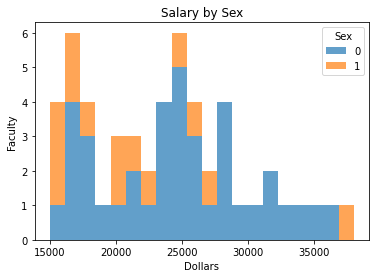

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

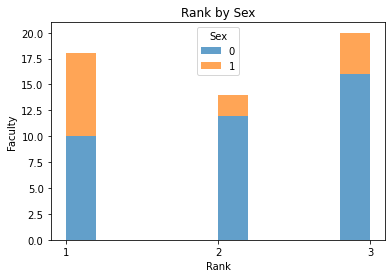

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

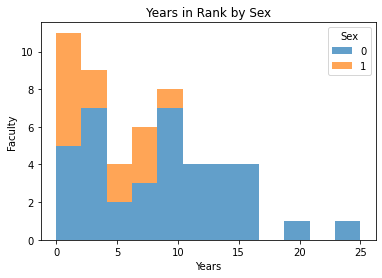

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [ ]:
df_10 = df[df['Year'] <= 10]

In [ ]:
combos_10 = get_combos(feature)
combo_10_scores = all_combo_scores(combos_10, df_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660304, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482044, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

Sex has no direct influence on Salary: score of 0.0068777005613497311

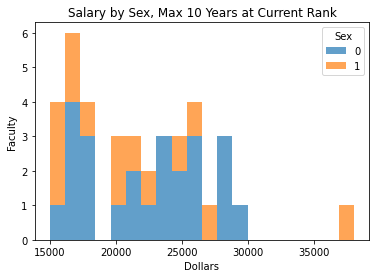

In [ ]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

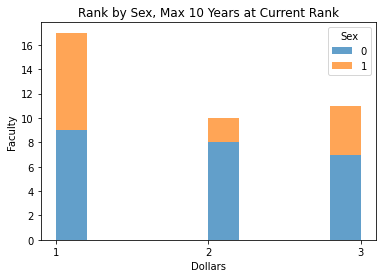

In [ ]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [ ]:
rank_feature = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_feature)
combo_rank_scores = all_combo_scores(combos_rank, df_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279376, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037697, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423391, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252243, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162727823, ('Degree',))]

There is no salary discrimination by Sex